# HW7 of PBC
- Part 3
- Data Analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./YouBikeRent_201707.csv')

print(data.head())

print(data.dtypes)

   sno           sna sarea      date  hour  lent  returned temperature  \
0    1  捷運市政府站(3號出口)   信義區  2017/7/1     0    15         9        27.3   
1    1  捷運市政府站(3號出口)   信義區  2017/7/1     1     6         3        27.1   
2    1  捷運市政府站(3號出口)   信義區  2017/7/1     2     3         2        26.9   
3    1  捷運市政府站(3號出口)   信義區  2017/7/1     3     8         4        26.8   
4    1  捷運市政府站(3號出口)   信義區  2017/7/1     4     5         1        26.5   

  relative_humidity wind_speed precipitation station_pres  
0                93        0.8             0       1000.6  
1                95          0             0       1001.3  
2                95          0             0       1000.9  
3                95          0             0       1000.3  
4                95          0             0       1000.2  
sno                   int64
sna                  object
sarea                object
date                 object
hour                  int64
lent                  int64
returned              int64

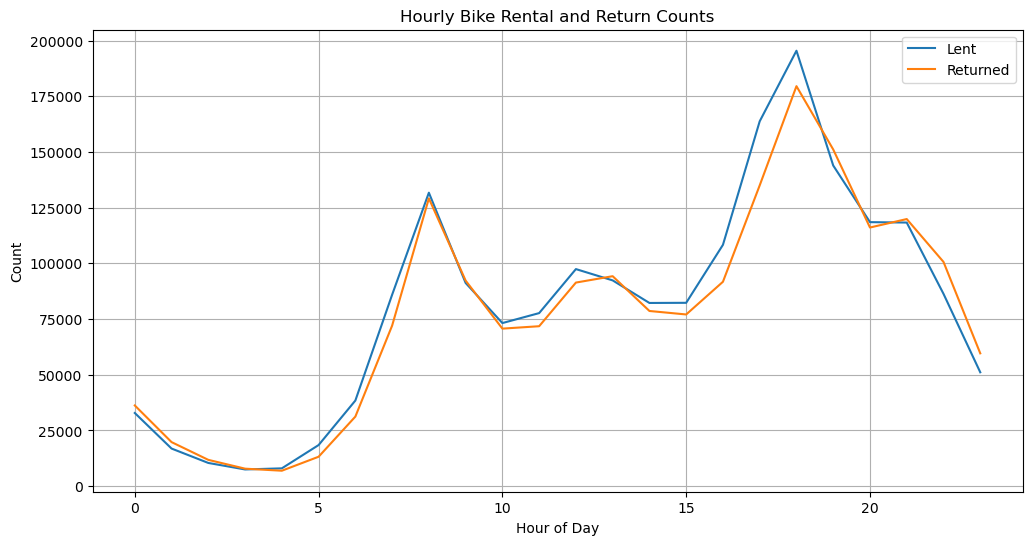

In [13]:
# 將 'date' 轉換為 datetime 類型，以便進行時間序列分析
data['date'] = pd.to_datetime(data['date'])

# 添加一個 'weekday' 欄位來分辨工作日與週末
data['weekday'] = data['date'].dt.dayofweek

# 分析每個小時的總租借和歸還數量
hourly_rental = data.groupby('hour')['lent'].sum()
hourly_return = data.groupby('hour')['returned'].sum()

# 繪製租借和歸還數量隨時間變化的圖
plt.figure(figsize=(12, 6))
plt.plot(hourly_rental.index, hourly_rental.values, label='Lent')
plt.plot(hourly_return.index, hourly_return.values, label='Returned')
plt.title('Hourly Bike Rental and Return Counts')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


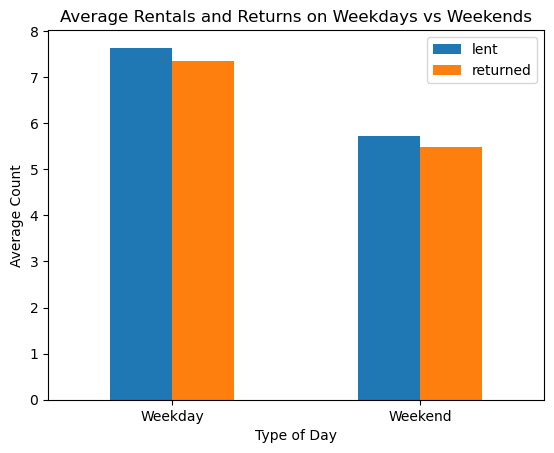

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['weekday'] = data['date'].dt.dayofweek

# 定義平日和週末
data['type_day'] = data['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# 計算平日和週末的平均借還量
average_rentals = data.groupby('type_day')[['lent', 'returned']].mean()  # 使用列表而非元組

# 繪圖展示結果
average_rentals.plot(kind='bar')
plt.title('Average Rentals and Returns on Weekdays vs Weekends')
plt.xlabel('Type of Day')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.show()



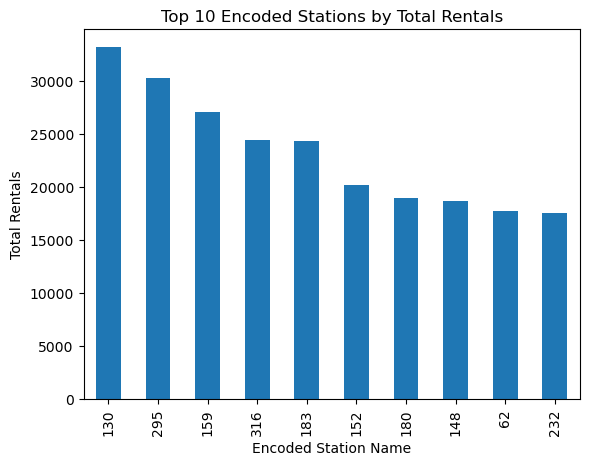

Top 10 Stations:
Encoded: 130, Original Name: 捷運公館站(2號出口)
Encoded: 295, Original Name: 羅斯福新生南路口
Encoded: 159, Original Name: 捷運市政府站(3號出口)
Encoded: 316, Original Name: 臺大資訊大樓
Encoded: 183, Original Name: 捷運芝山站(2號出口)
Encoded: 152, Original Name: 捷運大安站
Encoded: 180, Original Name: 捷運科技大樓站
Encoded: 148, Original Name: 捷運國父紀念館站(2號出口)
Encoded: 62, Original Name: 台灣科技大學
Encoded: 232, Original Name: 松山車站


In [14]:
data['sna_encoded'] = data['sna'].astype('category').cat.codes

# 建立站點名稱與其編碼的對應關係
station_name_map = data[['sna', 'sna_encoded']].drop_duplicates().set_index('sna_encoded')['sna']

# 計算基於編碼站點名稱的租借總數
encoded_rental_totals = data.groupby('sna_encoded')['lent'].sum()

# 獲取前 10 個最活躍的站點的租借總數
top_10_stations = encoded_rental_totals.sort_values(ascending=False).head(10)

# 繪製結果
top_10_stations.plot(kind='bar')
plt.title('Top 10 Encoded Stations by Total Rentals')
plt.xlabel('Encoded Station Name')
plt.ylabel('Total Rentals')
plt.show()

# 打印對應的原始站名
print("Top 10 Stations:")
for encoded in top_10_stations.index:
    print(f"Encoded: {encoded}, Original Name: {station_name_map[encoded]}")

In [ ]:
# 過濾出捷運公館站的數據，假設站名中包含了出口信息
gongguan_data = data[data['sna'].str.contains('捷運公館站')]

# 檢查一下具體的站點名稱，確保出口信息被正確地記錄
print(gongguan_data['sna'].unique())

['捷運公館站(2號出口)']


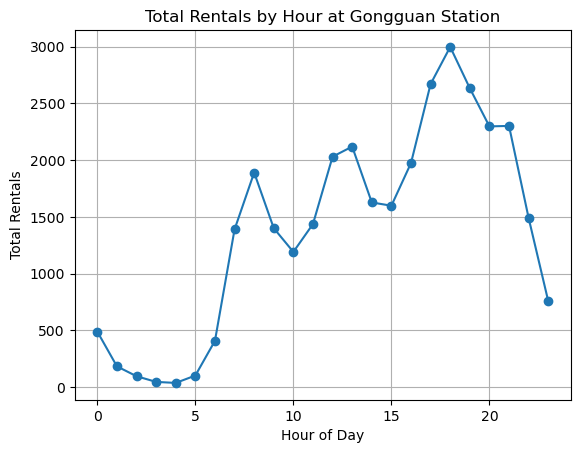

In [16]:
# 過濾出捷運公館站的數據
gongguan_data = data[data['sna'].str.contains('捷運公館站')]

# 計算每個小時的總借用量
gongguan_hourly = gongguan_data.groupby('hour')['lent'].sum()

# 繪製結果
gongguan_hourly.plot(kind='line', marker='o')
plt.title('Total Rentals by Hour at Gongguan Station')
plt.xlabel('Hour of Day')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()


In [24]:
# 過濾出非捷運公館站的數據
other_stations_data = data[~data['sna'].str.contains('捷運公館站')]
print(other_stations_data)

# 計算每個小時的平均借用量
other_stations_hourly_average = other_stations_data.groupby('hour')['lent'].mean()


        sno           sna sarea       date  hour  lent  returned temperature  \
0         1  捷運市政府站(3號出口)   信義區 2017-07-01     0    15         9        27.3   
1         1  捷運市政府站(3號出口)   信義區 2017-07-01     1     6         3        27.1   
2         1  捷運市政府站(3號出口)   信義區 2017-07-01     2     3         2        26.9   
3         1  捷運市政府站(3號出口)   信義區 2017-07-01     3     8         4        26.8   
4         1  捷運市政府站(3號出口)   信義區 2017-07-01     4     5         1        26.5   
...     ...           ...   ...        ...   ...   ...       ...         ...   
275275  389          福德國小   信義區 2017-07-31    19     0         0        29.7   
275276  389          福德國小   信義區 2017-07-31    20     0         0        29.2   
275277  389          福德國小   信義區 2017-07-31    21     0         0        28.2   
275278  389          福德國小   信義區 2017-07-31    22     0         0        28.1   
275279  389          福德國小   信義區 2017-07-31    23     0         0        26.9   

       relative_humidity wind_speed pre

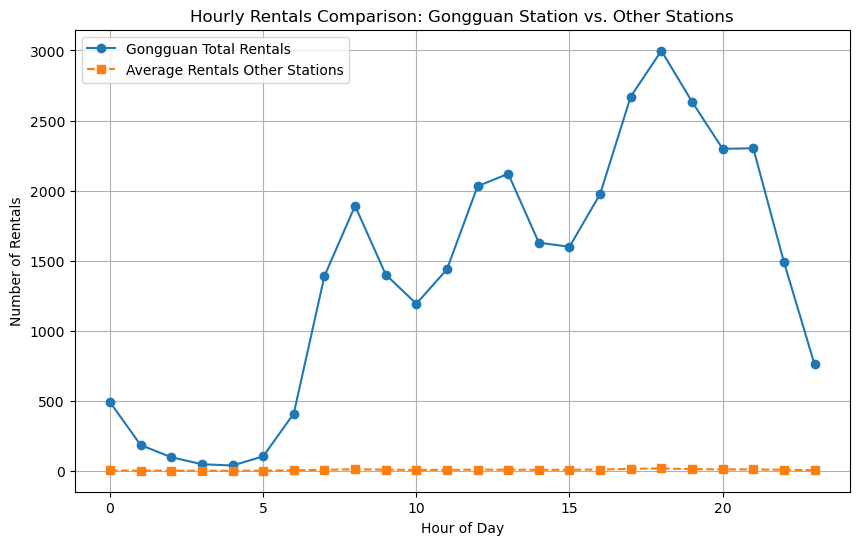

In [23]:
# 繪製結果
plt.figure(figsize=(10, 6))
plt.plot(gongguan_hourly.index, gongguan_hourly.values, label='Gongguan Total Rentals', marker='o')
plt.plot(other_stations_hourly_average.index, other_stations_hourly_average.values, label='Average Rentals Other Stations', marker='s', linestyle='--')

plt.title('Hourly Rentals Comparison: Gongguan Station vs. Other Stations')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rentals')
plt.legend()
plt.grid(True)
plt.show()


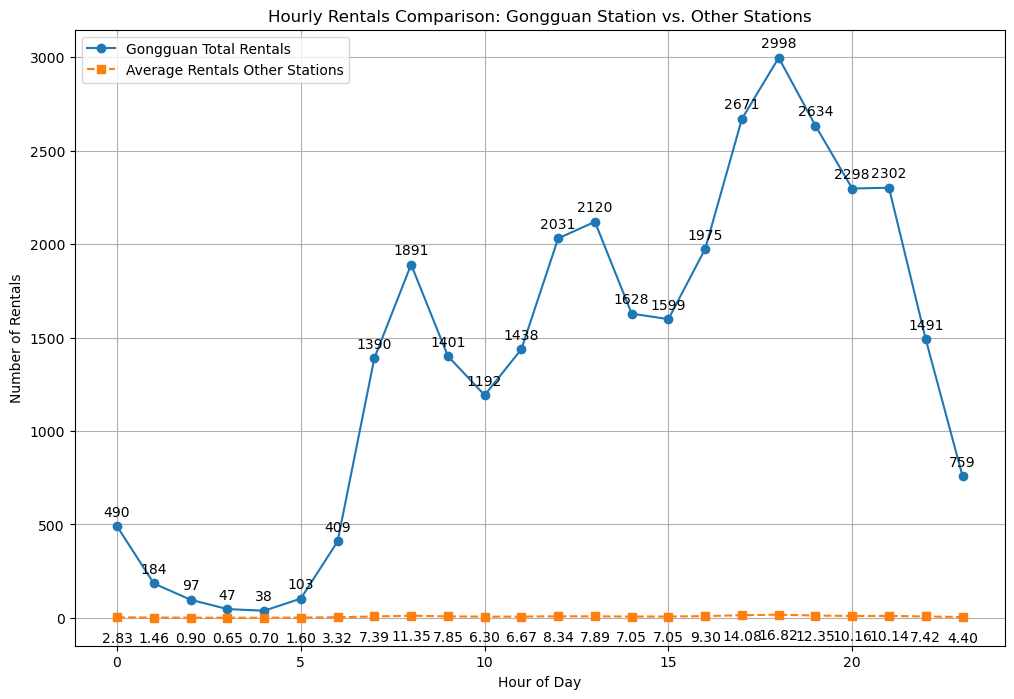

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# 加載數據
# data = pd.read_csv('your_data.csv')

# 過濾出捷運公館站的數據
gongguan_data = data[data['sna'].str.contains('捷運公館站')]
# 計算每個小時的總借用量
gongguan_hourly = gongguan_data.groupby('hour')['lent'].sum()

# 過濾出非捷運公館站的數據
other_stations_data = data[~data['sna'].str.contains('捷運公館站')]
# 計算每個小時的平均借用量
other_stations_hourly_average = other_stations_data.groupby('hour')['lent'].mean()

# 繪製結果
plt.figure(figsize=(12, 8))
plt.plot(gongguan_hourly.index, gongguan_hourly.values, label='Gongguan Total Rentals', marker='o')
plt.plot(other_stations_hourly_average.index, other_stations_hourly_average.values, label='Average Rentals Other Stations', linestyle='--', marker='s')

# 添加註釋 for Gongguan data
for hour, rentals in zip(gongguan_hourly.index, gongguan_hourly.values):
    plt.annotate(f'{rentals}', xy=(hour, rentals), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# 添加註釋 for Other Stations data
for hour, rentals in zip(other_stations_hourly_average.index, other_stations_hourly_average.values):
    plt.annotate(f'{rentals:.2f}', xy=(hour, rentals), xytext=(0, -10), textcoords='offset points', ha='center', va='top')

plt.title('Hourly Rentals Comparison: Gongguan Station vs. Other Stations')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rentals')
plt.legend()
plt.grid(True)
plt.show()

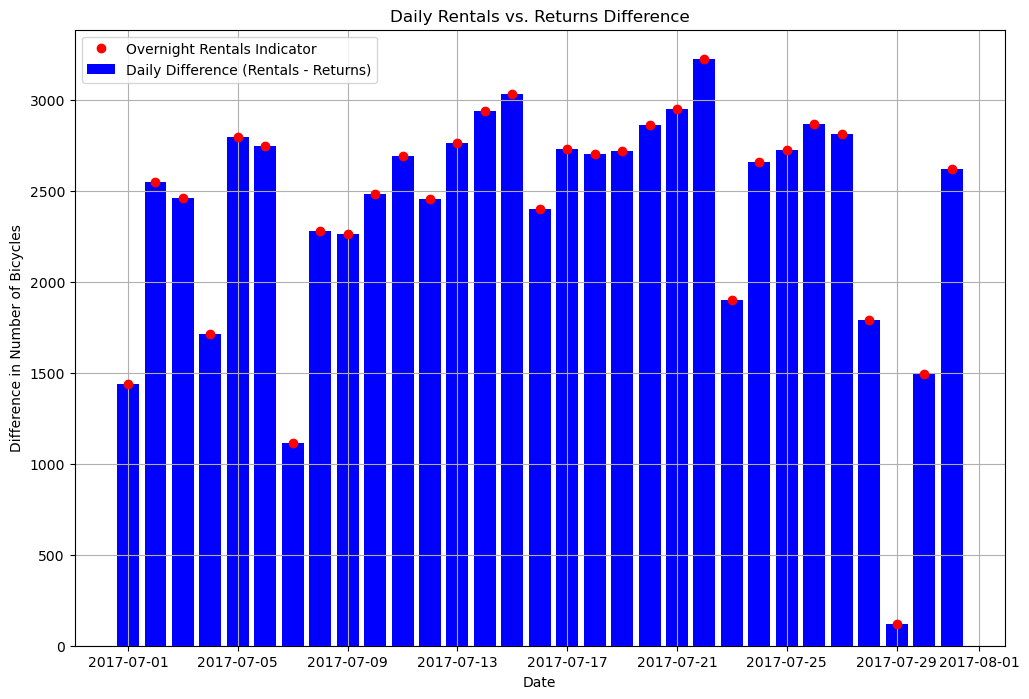

In [30]:
# 確保日期字段是日期格式
data['date'] = pd.to_datetime(data['date'])

# 計算每天的總借用量與總還車量
daily_rentals = data.groupby('date')['lent'].sum()
daily_returns = data.groupby('date')['returned'].sum()

# 計算每天的借用與還車差異
daily_difference = daily_rentals - daily_returns

# 檢查過夜借車的情況，即借用量多於還車量
overnight_rentals = daily_difference[daily_difference > 0]

# 繪製結果
plt.figure(figsize=(12, 8))
plt.bar(daily_difference.index, daily_difference.values, color='blue', label='Daily Difference (Rentals - Returns)')
plt.plot(overnight_rentals.index, overnight_rentals.values, 'ro', label='Overnight Rentals Indicator')

plt.title('Daily Rentals vs. Returns Difference')
plt.xlabel('Date')
plt.ylabel('Difference in Number of Bicycles')
plt.legend()
plt.grid(True)
plt.show()

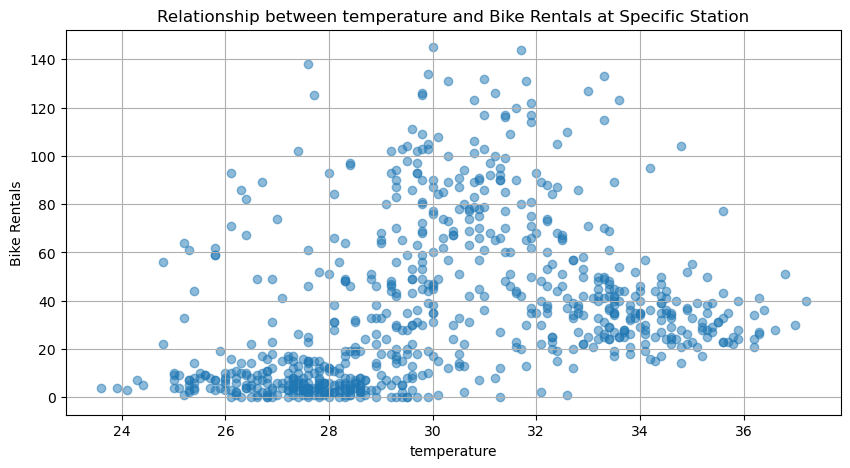

The Pearson correlation coefficient between temperature and bike rentals at Specific Station is: 0.31


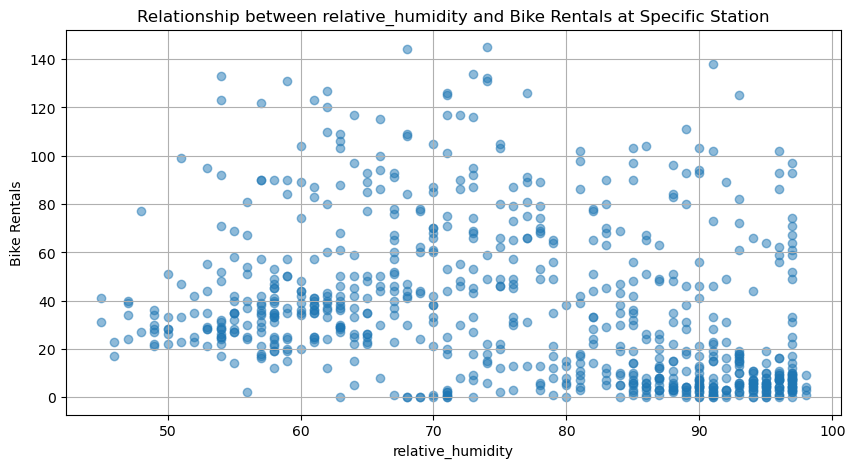

The Pearson correlation coefficient between relative_humidity and bike rentals at Specific Station is: -0.31


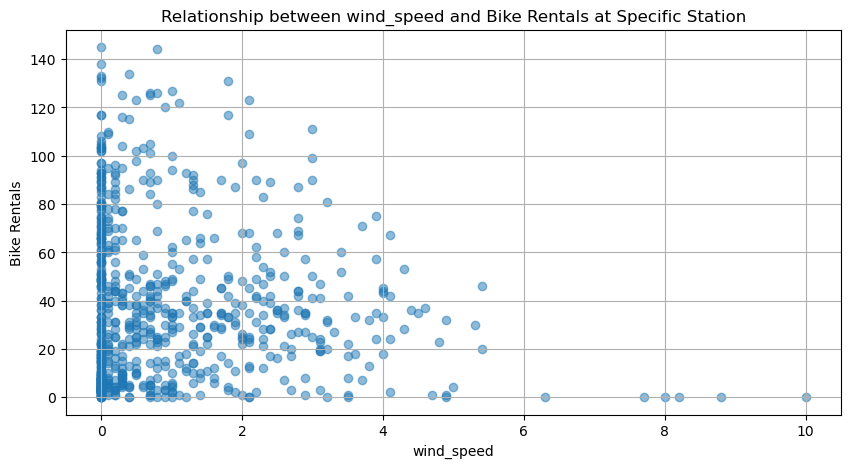

The Pearson correlation coefficient between wind_speed and bike rentals at Specific Station is: -0.05


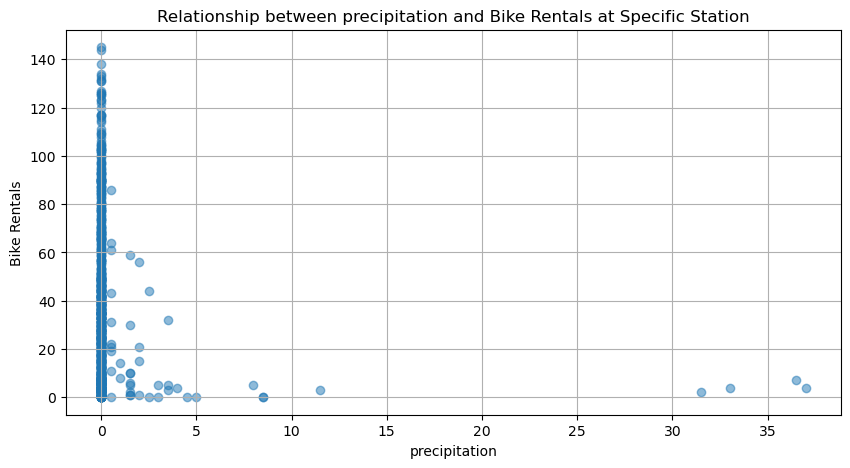

The Pearson correlation coefficient between precipitation and bike rentals at Specific Station is: -0.11


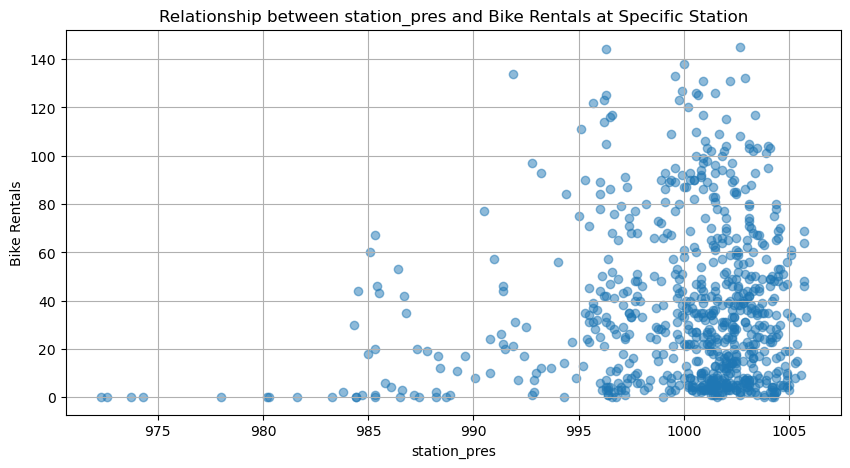

The Pearson correlation coefficient between station_pres and bike rentals at Specific Station is: 0.10


In [35]:

data['datetime'] = pd.to_datetime(data['date'].astype(str) + ' ' + data['hour'].astype(str) + ':00')

# 将气象数据从 'object' 类型转换为 'float'
data['temperature'] = pd.to_numeric(data['temperature'], errors='coerce')
data['relative_humidity'] = pd.to_numeric(data['relative_humidity'], errors='coerce')
data['wind_speed'] = pd.to_numeric(data['wind_speed'], errors='coerce')
data['precipitation'] = pd.to_numeric(data['precipitation'], errors='coerce')
data['station_pres'] = pd.to_numeric(data['station_pres'], errors='coerce')

# 计算每个小时的平均气象数据和借用量
hourly_data = data.groupby(['sna', 'datetime']).agg({
    'temperature': 'mean',
    'relative_humidity': 'mean',
    'wind_speed': 'mean',
    'precipitation': 'mean',
    'station_pres': 'mean',
    'lent': 'sum'
}).reset_index()

# 选择一个特定的站点
specific_station_data = hourly_data[hourly_data['sna'].str.contains('捷運市政府站')]

# 绘制图表和计算相关系数
metrics = ['temperature', 'relative_humidity', 'wind_speed', 'precipitation', 'station_pres']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.scatter(specific_station_data[metric], specific_station_data['lent'], alpha=0.5)
    plt.title(f'Relationship between {metric} and Bike Rentals at Specific Station')
    plt.xlabel(metric)
    plt.ylabel('Bike Rentals')
    plt.grid(True)
    plt.show()
    
    # 计算Pearson相关系数
    correlation = specific_station_data[metric].corr(specific_station_data['lent'])
    print(f'The Pearson correlation coefficient between {metric} and bike rentals at Specific Station is: {correlation:.2f}')


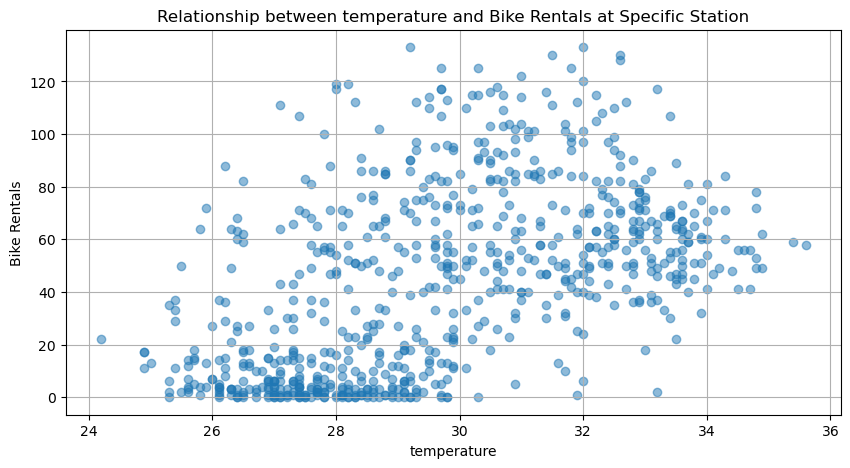

The Pearson correlation coefficient between temperature and bike rentals at Specific Station is: 0.51


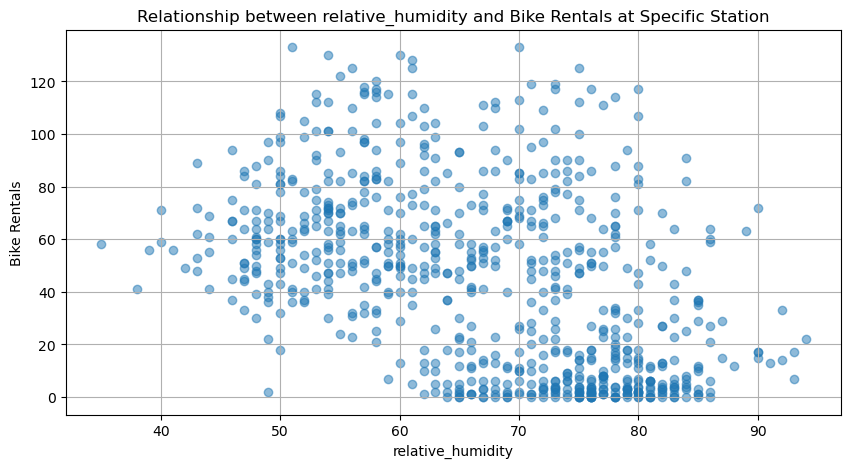

The Pearson correlation coefficient between relative_humidity and bike rentals at Specific Station is: -0.46


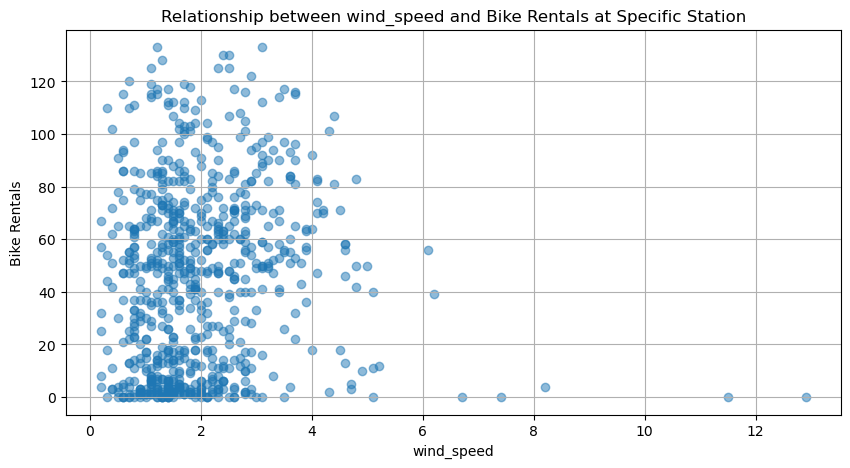

The Pearson correlation coefficient between wind_speed and bike rentals at Specific Station is: 0.08


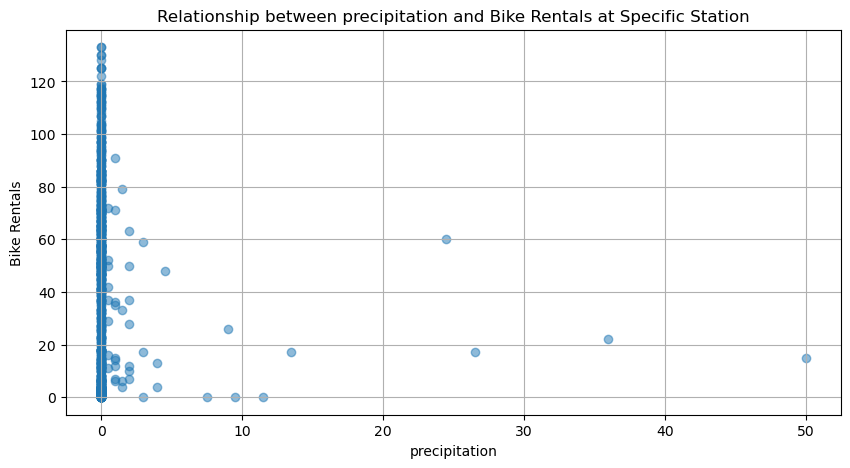

The Pearson correlation coefficient between precipitation and bike rentals at Specific Station is: -0.08


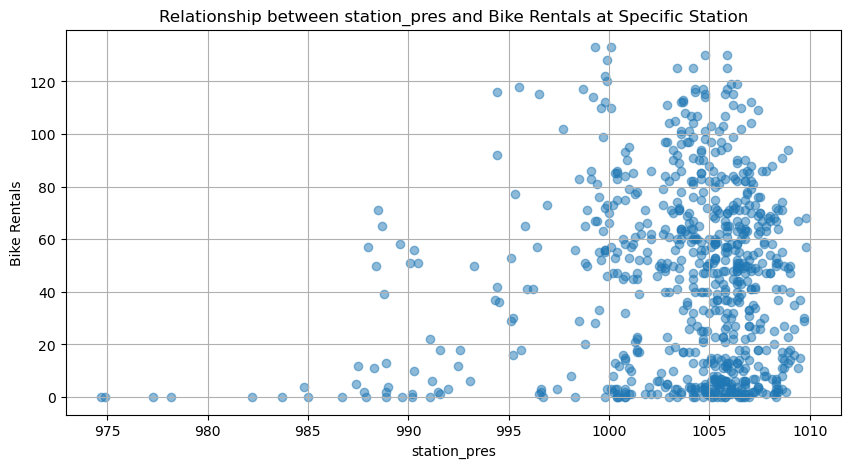

The Pearson correlation coefficient between station_pres and bike rentals at Specific Station is: 0.09


In [36]:

data['datetime'] = pd.to_datetime(data['date'].astype(str) + ' ' + data['hour'].astype(str) + ':00')

# 将气象数据从 'object' 类型转换为 'float'
data['temperature'] = pd.to_numeric(data['temperature'], errors='coerce')
data['relative_humidity'] = pd.to_numeric(data['relative_humidity'], errors='coerce')
data['wind_speed'] = pd.to_numeric(data['wind_speed'], errors='coerce')
data['precipitation'] = pd.to_numeric(data['precipitation'], errors='coerce')
data['station_pres'] = pd.to_numeric(data['station_pres'], errors='coerce')

# 计算每个小时的平均气象数据和借用量
hourly_data = data.groupby(['sna', 'datetime']).agg({
    'temperature': 'mean',
    'relative_humidity': 'mean',
    'wind_speed': 'mean',
    'precipitation': 'mean',
    'station_pres': 'mean',
    'lent': 'sum'
}).reset_index()

# 选择一个特定的站点
specific_station_data = hourly_data[hourly_data['sna'].str.contains('捷運公館站')]

# 绘制图表和计算相关系数
metrics = ['temperature', 'relative_humidity', 'wind_speed', 'precipitation', 'station_pres']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.scatter(specific_station_data[metric], specific_station_data['lent'], alpha=0.5)
    plt.title(f'Relationship between {metric} and Bike Rentals at Gongguan Station')
    plt.xlabel(metric)
    plt.ylabel('Bike Rentals')
    plt.grid(True)
    plt.show()
    
    # 计算Pearson相关系数
    correlation = specific_station_data[metric].corr(specific_station_data['lent'])
    print(f'The Pearson correlation coefficient between {metric} and bike rentals at Specific Station is: {correlation:.2f}')
